In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 불러오기 
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
fanuc_df = pd.read_csv('/content/drive/MyDrive/fanuc.csv')

In [4]:
fanuc_df = fanuc_df[['time', 'GW_WHEEL_REMAIN', 'RW_WHEEL_REMAIN']]

In [5]:
fanuc_df.time = pd.to_datetime(fanuc_df.time)

In [6]:
day = 86400
week = day * 7

In [7]:
cut_df = fanuc_df[week:].reset_index(drop=True)

In [8]:
cut_df = cut_df[cut_df.index % 86400 == 0].reset_index(drop=True)

In [9]:
cut_df.set_index('time', inplace=True)

In [11]:
fanuc_df.set_index('time', inplace=True)

In [12]:
def caculate_week_gradient(df, sec=week): # t는 이 시점으로 부터 일주일전 까지의 기울기를 구하겠다는 뜻
    grad = pd.DataFrame(columns=['time', 'GW_Gradient', 'RW_Gradient'])
    count = 0
    for i in df.index:
        n = 1
        gradient_list = []
        t1 = fanuc_df.index[fanuc_df.index == i] - datetime.timedelta(seconds=week)
        t2 = fanuc_df.index[fanuc_df.index == i]
        start = fanuc_df.loc[t1]
        end = fanuc_df.loc[t2]
        for j in fanuc_df.keys():
            gradient = (end[j].values - start[j].values)[0] / 7
            if (n == 1) and (gradient > - 0.6):
                if count != 0:
                    gradient = grad.loc[count-1][n]
            gradient_list.append(gradient)
            n += 1
        grad.loc[count] = [i, gradient_list[0], gradient_list[1]]
        count += 1
    return grad

In [13]:
grad = caculate_week_gradient(cut_df)

In [14]:
cut_df = cut_df.reset_index()

In [15]:
grad_df = pd.merge(cut_df, grad)

In [16]:
grad_df.set_index('time', inplace=True)

In [17]:
def caculate_remain_day(df = grad_df):
    key = grad_df.keys()
    count = 0
    grad_df['GW_Remain_Day'] = 0
    grad_df['RW_Remain_Day'] = 0
    for i in df.index:
        for j in range(2):
            grad_df[f'{key[j][0:2]}_Remain_Day'][count] = grad_df[key[j]][grad_df.index == i][0] / (-1 * grad_df[key[j+2]][grad_df.index == i][0])
        count += 1

In [19]:
caculate_remain_day(grad_df)

<ipython-input-17-a71e37c8fe57>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_df[f'{key[j][0:2]}_Remain_Day'][count] = grad_df[key[j]][grad_df.index == i][0] / (-1 * grad_df[key[j+2]][grad_df.index == i][0])


In [20]:
grad_df.reset_index(inplace=True)

In [21]:
grad_cut_df = grad_df[['time', 'GW_Remain_Day', 'RW_Remain_Day']]

In [22]:
fanuc_df.reset_index(inplace=True)

In [23]:
tot_df = pd.merge(fanuc_df, grad_cut_df, how='outer')

In [24]:
tot_df.set_index('time', inplace=True)

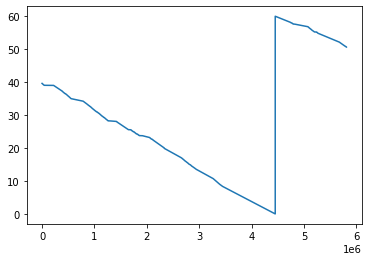

In [25]:
fanuc_df['GW_WHEEL_REMAIN'].plot()

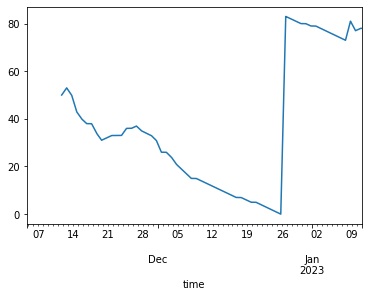

In [26]:
tot_df['GW_Remain_Day'].interpolate().plot()

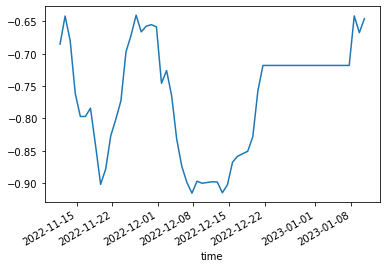

In [27]:
grad_df.set_index('time')['GW_Gradient'].plot()

In [28]:
tot_df['GW_Remain_Day'] = tot_df['GW_Remain_Day'].interpolate()
tot_df['RW_Remain_Day'] = tot_df['RW_Remain_Day'].interpolate()

In [137]:
tot_df.fillna(0, inplace=True)

In [138]:
tot_df.to_csv('/content/drive/MyDrive/fanuc_preprocess.csv')

In [102]:
data_df = pd.read_csv('/content/drive/MyDrive/Data.csv')
rslt_df = pd.read_csv('/content/drive/MyDrive/RSLT.csv')
rslt_bad = pd.read_csv('/content/drive/MyDrive/RSLT_BAD.csv')
rslt_stock = pd.read_csv('/content/drive/MyDrive/RSLT_STOCK.csv')

In [103]:
data_df = data_df.interpolate()
data_df.set_index('time', inplace=True)

In [104]:
rslt_df.dropna(inplace=True)
rslt_df['time'] = rslt_df['time'].apply(lambda x: x.replace(',', ''))
rslt_df.set_index('time', inplace=True)

In [105]:
rslt_bad = rslt_bad[:-1]
rslt_bad = rslt_bad.fillna(0)
rslt_bad.set_index('time', inplace=True)

In [106]:
rslt_stock = rslt_stock.dropna(axis=0)
rslt_stock['time'] = rslt_stock['time'].apply(lambda x: x.replace(',', ''))
rslt_stock.set_index('time', inplace=True)

<ipython-input-106-bd0665f70840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_stock['time'] = rslt_stock['time'].apply(lambda x: x.replace(',', ''))


In [107]:
data_df.to_csv('/content/drive/MyDrive/data_preprocess.csv')
rslt_df.to_csv('/content/drive/MyDrive/rslt_preprocess.csv')
rslt_bad.to_csv('/content/drive/MyDrive/rslt_bad_preprocess.csv')
rslt_stock.to_csv('/content/drive/MyDrive/rslt_stock_preprocess.csv')

In [108]:
fanuc_df = pd.read_csv('/content/drive/MyDrive/fanuc.csv')

In [111]:
fanuc_df.drop(['GW_WHEEL_REMAIN', 'RW_WHEEL_REMAIN'], axis=1, inplace=True)

In [117]:
fanuc_df['RW_DRESSING_INTERVAL'] = fanuc_df['RW_DRESSING_INTERVAL'].interpolate()

In [120]:
fanuc_dressing = fanuc_df[['time', 'RW_DRESSING_INTERVAL']]

In [122]:
fanuc_df.drop('RW_DRESSING_INTERVAL', axis=1, inplace=True)

In [125]:
fanuc_df.dropna(inplace=True)

In [128]:
fanuc_df.reset_index(drop=True, inplace=True)

In [134]:
fanuc_dressing.set_index('time', inplace=True)
fanuc_df.set_index('time', inplace=True)

KeyError: ignored

In [133]:
fanuc_dressing.to_csv('/content/drive/MyDrive/fanuc_dressing.csv')
fanuc_df.to_csv('/content/drive/MyDrive/fanuc_df.csv')